### Import Libraries and Datasets

In [1]:
#Importing Libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from termcolor import colored, cprint
from IPython.display import Image, display
from IPython.display import clear_output
from time import sleep
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [3]:
pokemon_data = pd.read_csv("C:\\Users\\12675\\Downloads\\pokemon.csv")

### Exploratory Data Analysis

In [4]:
print(pokemon_data.shape)
pokemon_data

(800, 12)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [5]:
pokemon_data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


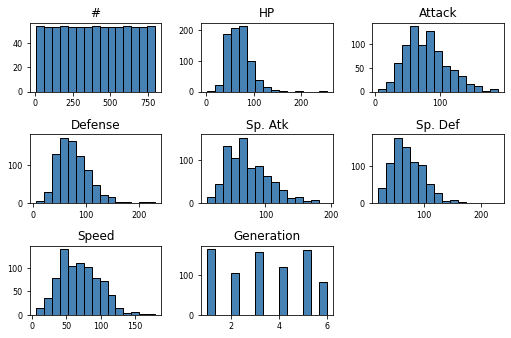

In [6]:
pokemon_data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

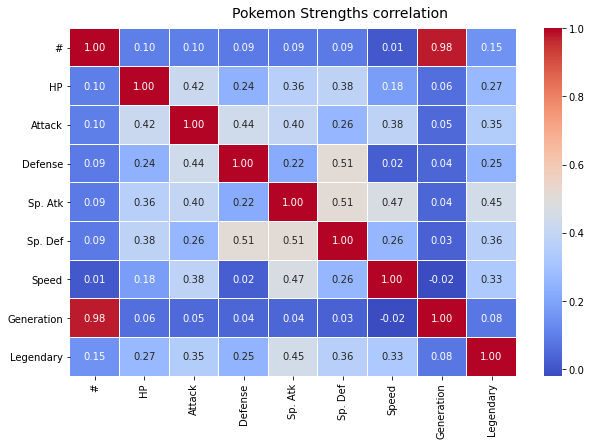

In [7]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = pokemon_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Pokemon Strengths correlation', fontsize=14)

C:\Users\12675\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


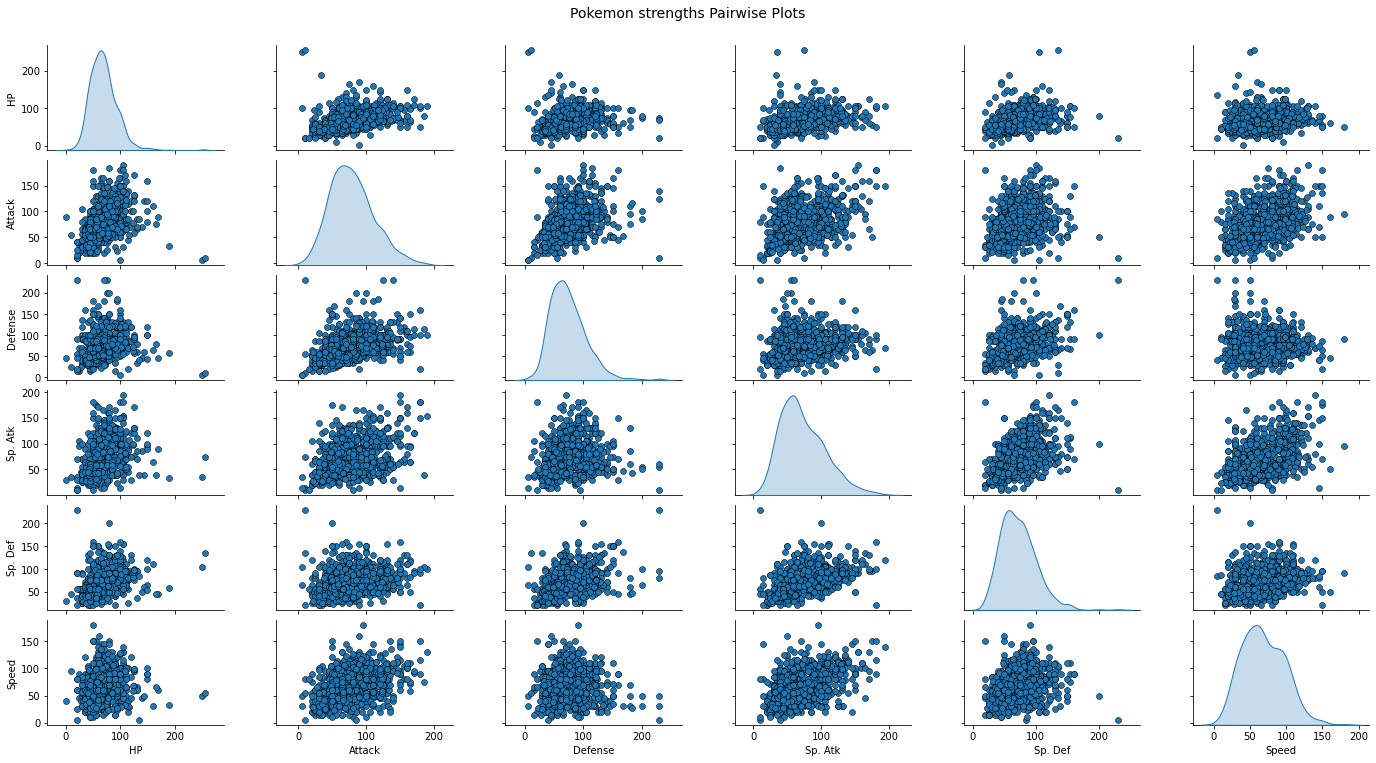

In [8]:
# Pair-wise Scatter Plots
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']
pp = sns.pairplot(pokemon_data[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pokemon strengths Pairwise Plots', fontsize=14)

### Data Transformation

#### Standardize Numerical Values

In [9]:
## Scaling the variables 
pokemon_data_subset = pokemon_data.loc[:,'HP':'Generation']
sc = StandardScaler()
pokemon_data_scaled = sc.fit_transform(pokemon_data_subset)
# pokemon_data_scaled_df = pd.DataFrame(pokemon_data_scaled)
#Can alternatively use MinMax Scalers

C:\Users\12675\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\12675\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\12675\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

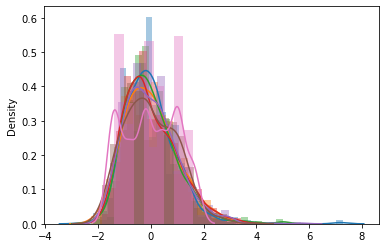

In [10]:
for i in range(7):
  sns.distplot(pokemon_data_scaled[:,i], hist=True)

All the variables have the same mean of 0 and standard deviation of 1

In [ ]:
## Assign weights to variables that are more important 
#Add more weight to the generation variable
# pokemon_data_scaled[6] = pokemon_data_scaled[6]*1.5

#### Principal Component Analysis

PCA is a dimentionality reduction method that is often used to reduce the dimentionality of large datasets by transforming a large set of variables into smaller ones that still contain most of the information of the large set.
It helps remove multicollinearity and noise from the data, along with improving run-time for clustering

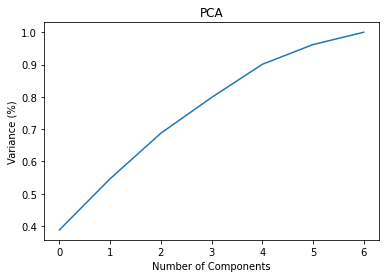

In [22]:
pca = PCA().fit(pokemon_data_scaled)

#Plotting the cumulative summation of explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('PCA')
plt.show()

In [17]:
#Variance of each component
print('Variance of each component:', pca.explained_variance_ratio_)

#Total variance explained
print('Total variance explained:', sum(list(pca.explained_variance_ratio_)[:4])*100)

Variance of each component: [0.38791728 0.15854266 0.14092884 0.11068465 0.1027104  0.061063
 0.03815317]
Total variance explained: 79.80734261924611


Considering 4 Principal components as it corresponds to ~80% of explained variance

In [18]:
#PCA with number of components as 4
pca = PCA(n_components=4)
pokemon_data_pca = pca.fit_transform(pokemon_data_scaled)

In [19]:
pokemon_data_pca.shape

(800, 4)

### K Means Clustering

#### On scaled data

C:\Users\12675\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


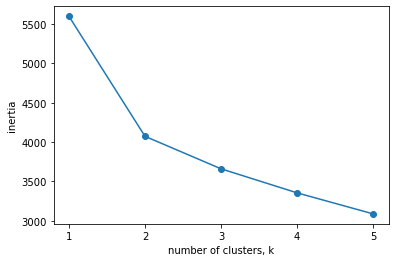

In [23]:
# Check the ideal number of clusters, use the 'elbow rule' for deciding

k_values = range(1, 6)
inertias = []

for k in k_values:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(pokemon_data_scaled)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(k_values, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k_values)
plt.show() # --> 3 looks like a good number of clusters

Based on the elbow curve create 3 clusters using KMeans

In [26]:
k_means = KMeans(n_clusters=3)
k_means.fit(pokemon_data_scaled)

KMeans(n_clusters=3)

In [28]:
y_hat = k_means.predict(pokemon_data_scaled)

C:\Users\12675\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

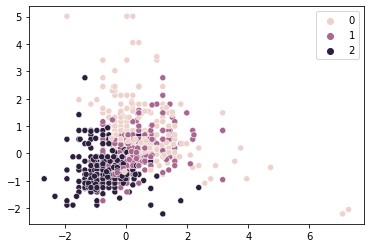

In [30]:
sns.scatterplot(pokemon_data_scaled[:,0], pokemon_data_scaled[:,2], hue = clusterer.labels_)

#### Clustering on Data post dimension reduction (PCA)

C:\Users\12675\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


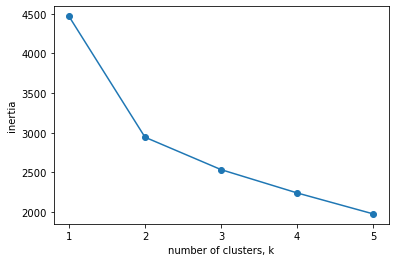

In [31]:
# Check the ideal number of clusters, use the 'elbow rule' for deciding
k_values = range(1, 6)
inertias = []

for k in k_values:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(pokemon_data_pca)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(k_values, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k_values)
plt.show() # --> 3 looks like a good number of clusters

Based on the elbow curve create 3 clusters using KMeans

In [32]:
k_means = KMeans(n_clusters=3)
k_means.fit(pokemon_data_scaled)

KMeans(n_clusters=3)

C:\Users\12675\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

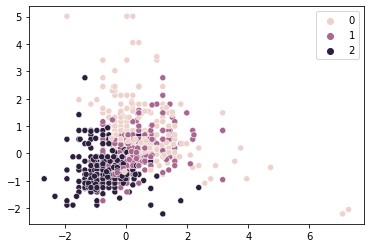

In [33]:
sns.scatterplot(pokemon_data_scaled[:,0], pokemon_data_scaled[:,2], hue = clusterer.labels_)

Similar clusters using both Scaled and PCA data

### Evaluation Metrics

In [36]:
from sklearn import metrics

In [43]:
metrics.silhouette_score(pokemon_data_scaled, k_means.labels_, metric = 'euclidean')

0.21491492050651057

In [44]:
metrics.calinski_harabasz_score(pokemon_data_scaled, k_means.labels_)

211.2395816670109

### Profiling

In [34]:
pd.crosstab( clusterer.labels_, pokemon_data['Type 1'])

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
row_0,,,,,,,,,,,,,,,,,,
0,14,7,5,5,6,10,6,0,10,19,11,9,22,8,9,24,16,40
1,13,12,19,23,3,7,25,3,9,19,7,6,26,6,28,5,5,21
2,42,12,8,16,8,10,21,1,13,32,14,9,50,14,20,15,6,51


In [45]:
pd.crosstab( clusterer.labels_, pokemon_data['Type 2'])

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
row_0,,,,,,,,,,,,,,,,,,
0,1,7,5,2,7,7,0,14,5,9,20,6,0,2,12,9,11,5
1,0,8,9,2,7,15,8,45,4,4,4,6,2,10,12,0,7,2
2,2,5,4,2,9,4,4,38,5,12,11,2,2,22,9,5,4,7


In [46]:
pd.crosstab( clusterer.labels_, pokemon_data['Legendary'])

Legendary,False,True
row_0,,
0,211,10
1,182,55
2,342,0


Cluster 1 has legendary pokemon and 0 has no legendary pokemon

### Heirarchical Clustering

Experimenting with heirarchical clustering as the number of clusters is not pre-defined. With Heirarchical clustering we can cut the dendogram where the vertical distance is sufficient enough to explain the dissimilarity between two clusters. Considering that the dataset is relatively small (800 observations), heirarchical clustering, which usually has a high computation time can be effectively used

Multiple distance-linkage combinations were tried and result was analysed with the help of profiling variables such as Type and Legendary indicator.
Based on Cluster composition and Cluster goodness, these combinations were rejected and finally Complete linkage and correlation distance were chosen

In [47]:
Z = linkage(pokemon_data_pca, 'complete', metric = 'correlation')

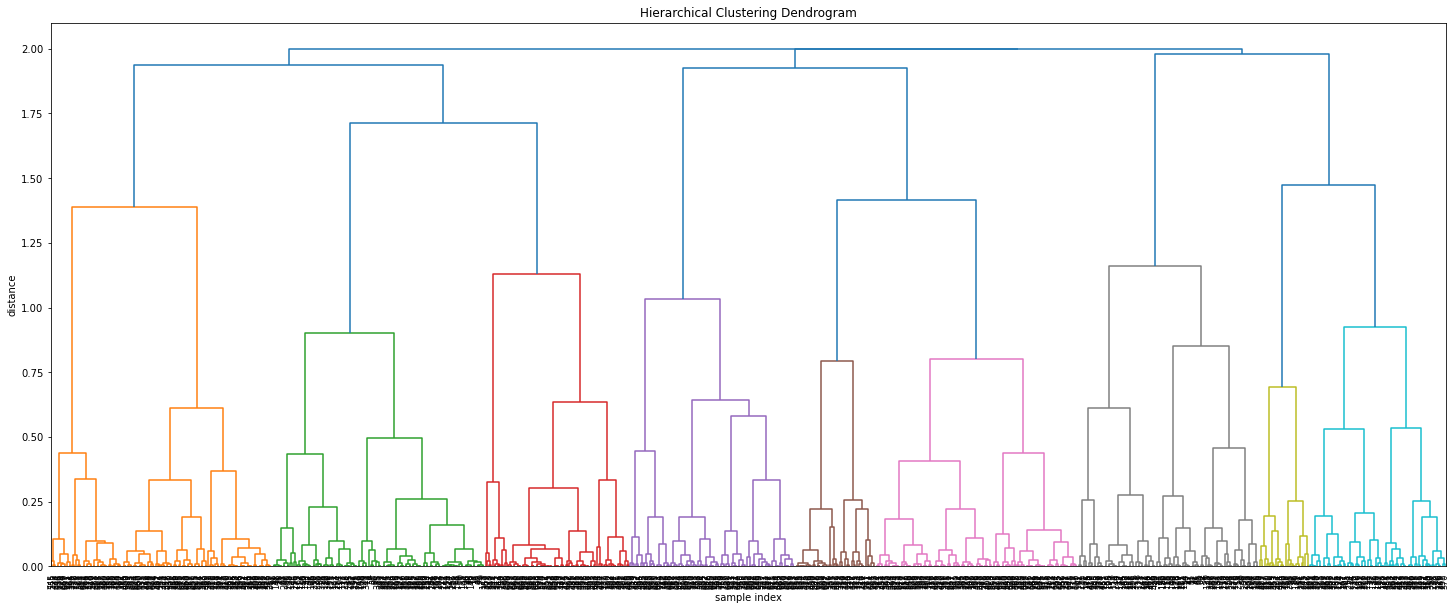

In [48]:
##Plotting dendrogram

plt.figure(figsize = (25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
          leaf_rotation=90.,
          leaf_font_size=8.)
plt.show()

In [49]:
max_d = 1.85
clusters = fcluster(Z, max_d, criterion = 'distance')

def add_clusters_to_frame(or_data, clusters):
    or_frame = pd.DataFrame(data = or_data)
    or_frame_labelled = pd.concat([or_frame, pd.DataFrame(clusters)], axis = 1)
    return(or_frame_labelled)

In [50]:
df = add_clusters_to_frame(pokemon_data_pca, clusters)
df.columns = ['PC1','PC2','PC3','PC4','cluster']

##Distribution of pokemon across clusters
print(df['cluster'].value_counts())

2    205
4    162
1    127
6    107
5    104
3     95
Name: cluster, dtype: int64


In [51]:
##Extracting heirarchical clusters and assigning to the actual dataset 
pokemon_data['cluster_hierarchical'] = list(df['cluster'])

In [52]:
pokemon_data.head(2)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster_hierarchical
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,2
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2


### Profiling Heirarchical Clusters

In [ ]:
## Calculating means for different variables at cluster level to analyse cluster performance

In [53]:
f = {'HP':['mean'], 'Attack':['mean'], 'Defense':['mean'],\
     'Sp. Atk':['mean'],'Sp. Def':['mean'], 'Speed':['mean'], 'Generation':['mean']}

In [54]:
profile_mean = pokemon_data.groupby(['cluster_hierarchical'], as_index=True).agg(f)

In [55]:
profile_mean

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
,mean,mean,mean,mean,mean,mean,mean
cluster_hierarchical,,,,,,,
1,54.299213,59.897638,68.086614,48.094488,58.598425,41.464567,4.354331
2,49.902439,50.843902,51.600000,53.858537,54.795122,55.975610,2.595122
3,85.231579,98.673684,94.136842,68.347368,78.431579,59.568421,4.968421
4,81.129630,97.018519,82.500000,106.907407,91.327160,93.771605,4.425926
5,70.067308,83.413462,69.326923,93.134615,82.442308,97.932692,1.538462
6,91.158879,106.588785,96.551402,71.112150,75.018692,63.981308,2.102804


In [56]:
profile_mean.columns = profile_mean.columns.droplevel(1)

In [57]:
profile_mean_transpose = profile_mean.T.reset_index()

In [58]:
profile_mean_transpose

cluster_hierarchical,index,1,2,3,4,5,6
0,HP,54.299213,49.902439,85.231579,81.129630,70.067308,91.158879
1,Attack,59.897638,50.843902,98.673684,97.018519,83.413462,106.588785
2,Defense,68.086614,51.600000,94.136842,82.500000,69.326923,96.551402
3,Sp. Atk,48.094488,53.858537,68.347368,106.907407,93.134615,71.112150
4,Sp. Def,58.598425,54.795122,78.431579,91.327160,82.442308,75.018692
5,Speed,41.464567,55.975610,59.568421,93.771605,97.932692,63.981308
6,Generation,4.354331,2.595122,4.968421,4.425926,1.538462,2.102804


In [59]:
f = {'HP':['mean'], 'Attack':['mean'], 'Defense':['mean'],\
     'Sp. Atk':['mean'],'Sp. Def':['mean'], 'Speed':['mean'], 'Generation':['mean']}

In [60]:
population_mean = pokemon_data.agg({'HP':['mean'],'Attack':['mean'], 'Defense':['mean'],\
                                    'Sp. Atk':['mean'], 'Sp. Def':['mean'], 'Speed':['mean'],'Generation':['mean']})

In [61]:
population_mean = population_mean.T

In [62]:
population_mean = population_mean.rename(index = str, columns = {0:'Polutation_Mean'})

In [63]:
population_mean = population_mean.reset_index()

In [64]:
population_mean

,index,mean
0,HP,69.25875
1,Attack,79.00125
2,Defense,73.84250
3,Sp. Atk,72.82000
4,Sp. Def,71.90250
5,Speed,68.27750
6,Generation,3.32375


In [65]:
dataset_mean_final = population_mean.merge(profile_mean_transpose, how = 'left', on = ['index'])

In [66]:
dataset_mean_final

,index,mean,1,2,3,4,5,6
0,HP,69.25875,54.299213,49.902439,85.231579,81.129630,70.067308,91.158879
1,Attack,79.00125,59.897638,50.843902,98.673684,97.018519,83.413462,106.588785
2,Defense,73.84250,68.086614,51.600000,94.136842,82.500000,69.326923,96.551402
3,Sp. Atk,72.82000,48.094488,53.858537,68.347368,106.907407,93.134615,71.112150
4,Sp. Def,71.90250,58.598425,54.795122,78.431579,91.327160,82.442308,75.018692
5,Speed,68.27750,41.464567,55.975610,59.568421,93.771605,97.932692,63.981308
6,Generation,3.32375,4.354331,2.595122,4.968421,4.425926,1.538462,2.102804
